In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regression related stuffs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Multicollinearity measure
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing the dataset
- Converting p and r from seconds to hours
- Create all predictors
- Split the dataset into train and test subsets

In [3]:
# Read and merge score-dist-1.csv and score-dist-2.csv
columns = ['p', 'q', 'r', 'score']
dist1 = pd.read_csv("DATA/score-distribution-1.csv", names=columns)
dist2 = pd.read_csv("DATA/score-distribution-2.csv", names=columns)

dist = pd.concat([dist1, dist2], ignore_index=True)
dist.head()

,p,q,r,score
0,10.0,4.0,27541.0,0.026960
1,11.0,2.0,27614.0,0.036098
2,8196.0,8.0,27804.0,0.040375
3,9272.0,1.0,27834.0,0.039768
4,24297.0,78.0,27840.0,0.039782


In [4]:
# Time conversion (seconds to hours)
for column in ['p', 'r']:
    dist[column] = dist[column] / 3600 # seconds in one hour
dist.head()

,p,q,r,score
0,0.002778,4.0,7.650278,0.026960
1,0.003056,2.0,7.670556,0.036098
2,2.276667,8.0,7.723333,0.040375
3,2.575556,1.0,7.731667,0.039768
4,6.749167,78.0,7.733333,0.039782


In [5]:
# Separate features from target
features = dist[["p", "q", "r"]].copy()
target = dist["score"].copy()

In [6]:
# Quadratic terms
features[['p2', 'q2', 'r2']] = features[['p', 'q', 'r']]**2
features['pq'] = features['p']*features['q']
features.head()

,p,q,r,p2,q2,r2,pq
0,0.002778,4.0,7.650278,0.000008,16.0,58.526750,0.011111
1,0.003056,2.0,7.670556,0.000009,4.0,58.837423,0.006111
2,2.276667,8.0,7.723333,5.183211,64.0,59.649878,18.213333
3,2.575556,1.0,7.731667,6.633486,1.0,59.778669,2.575556
4,6.749167,78.0,7.733333,45.551251,6084.0,59.804444,526.435000


In [7]:
# Cubic terms
features[['p3', 'q3', 'r3']] = features[['p', 'q', 'r']]**3
features['p2q'] = features['p']**2 * features['q']
features['pq2'] = features['p'] * features['q']**2
features.head()

,p,q,r,p2,q2,r2,pq,p3,q3,r3,p2q,pq2
0,0.002778,4.0,7.650278,0.000008,16.0,58.526750,0.011111,2.143347e-08,64.0,447.745896,0.000031,0.044444
1,0.003056,2.0,7.670556,0.000009,4.0,58.837423,0.006111,2.852795e-08,8.0,451.315718,0.000019,0.012222
2,2.276667,8.0,7.723333,5.183211,64.0,59.649878,18.213333,1.180044e+01,512.0,460.695889,41.465689,145.706667
3,2.575556,1.0,7.731667,6.633486,1.0,59.778669,2.575556,1.708491e+01,1.0,462.188746,6.633486,2.575556
4,6.749167,78.0,7.733333,45.551251,6084.0,59.804444,526.435000,3.074330e+02,474552.0,462.487704,3552.997554,41061.930000


In [8]:
# Quartic terms
features[['p4', 'q4', 'r4']] = features[['p', 'q', 'r']]**4
features['p3q'] = features['p']**3 * features['q']
features['p2q2'] = features['p']**2 * features['q']**2
features['pq3'] = features['p'] * features['q']**3
features.head()

,p,q,r,p2,q2,r2,pq,p3,q3,r3,p2q,pq2,p4,q4,r4,p3q,p2q2,pq3
0,0.002778,4.0,7.650278,0.000008,16.0,58.526750,0.011111,2.143347e-08,64.0,447.745896,0.000031,0.044444,5.953742e-11,256.0,3425.380475,8.573388e-08,0.000123,1.777778e-01
1,0.003056,2.0,7.670556,0.000009,4.0,58.837423,0.006111,2.852795e-08,8.0,451.315718,0.000019,0.012222,8.716873e-11,16.0,3461.842290,5.705590e-08,0.000037,2.444444e-02
2,2.276667,8.0,7.723333,5.183211,64.0,59.649878,18.213333,1.180044e+01,512.0,460.695889,41.465689,145.706667,2.686568e+01,4096.0,3558.107919,9.440355e+01,331.725511,1.165653e+03
3,2.575556,1.0,7.731667,6.633486,1.0,59.778669,2.575556,1.708491e+01,1.0,462.188746,6.633486,2.575556,4.400314e+01,1.0,3573.489321,1.708491e+01,6.633486,2.575556e+00
4,6.749167,78.0,7.733333,45.551251,6084.0,59.804444,526.435000,3.074330e+02,474552.0,462.487704,3552.997554,41061.930000,2.074916e+03,37015056.0,3576.571575,2.397977e+04,277133.809225,3.202831e+06


In [9]:
# Quintic terms
features[['p5', 'q5', 'r5']] = features[['p', 'q', 'r']]**5
features['p4q'] = features['p']**4 * features['q']
features['p3q2'] = features['p']**3 * features['q']**2
features['p2q3'] = features['p']**2 * features['q']**3
features['pq4'] = features['p'] * features['q']**4
features.head()

,p,q,r,p2,q2,r2,pq,p3,q3,r3,...,p3q,p2q2,pq3,p5,q5,r5,p4q,p3q2,p2q3,pq4
0,0.002778,4.0,7.650278,0.000008,16.0,58.526750,0.011111,2.143347e-08,64.0,447.745896,...,8.573388e-08,0.000123,1.777778e-01,1.653817e-13,1.024000e+03,26205.112125,2.381497e-10,3.429355e-07,4.938272e-04,7.111111e-01
1,0.003056,2.0,7.670556,0.000009,4.0,58.837423,0.006111,2.852795e-08,8.0,451.315718,...,5.705590e-08,0.000037,2.444444e-02,2.663489e-13,3.200000e+01,26554.253611,1.743375e-10,1.141118e-07,7.469136e-05,4.888889e-02
2,2.276667,8.0,7.723333,5.183211,64.0,59.649878,18.213333,1.180044e+01,512.0,460.695889,...,9.440355e+01,331.725511,1.165653e+03,6.116419e+01,3.276800e+04,27480.453494,2.149254e+02,7.552284e+02,2.653804e+03,9.325227e+03
3,2.575556,1.0,7.731667,6.633486,1.0,59.778669,2.575556,1.708491e+01,1.0,462.188746,...,1.708491e+01,6.633486,2.575556e+00,1.133325e+02,1.000000e+00,27629.028263,4.400314e+01,1.708491e+01,6.633486e+00,2.575556e+00
4,6.749167,78.0,7.733333,45.551251,6084.0,59.804444,526.435000,3.074330e+02,474552.0,462.487704,...,2.397977e+04,277133.809225,3.202831e+06,1.400396e+04,2.887174e+09,27658.820182,1.618435e+05,1.870422e+06,2.161644e+07,2.498208e+08


In [10]:
# Sextic terms
features[['p6', 'q6', 'r6']] = features[['p', 'q', 'r']]**6
features['p5q'] = features['p']**5 * features['q']
features['p4q2'] = features['p']**4 * features['q']**2
features['p3q3'] = features['p']**3 * features['q']**3
features['p2q4'] = features['p']**2 * features['q']**4
features['pq5'] = features['p'] * features['q']**5
features.head()

,p,q,r,p2,q2,r2,pq,p3,q3,r3,...,p2q3,pq4,p6,q6,r6,p5q,p4q2,p3q3,p2q4,pq5
0,0.002778,4.0,7.650278,0.000008,16.0,58.526750,0.011111,2.143347e-08,64.0,447.745896,...,4.938272e-04,7.111111e-01,4.593937e-16,4.096000e+03,200476.386956,6.615269e-13,9.525987e-10,1.371742e-06,1.975309e-03,2.844444e+00
1,0.003056,2.0,7.670556,0.000009,4.0,58.837423,0.006111,2.852795e-08,8.0,451.315718,...,7.469136e-05,4.888889e-02,8.138439e-16,6.400000e+01,203685.877556,5.326978e-13,3.486749e-10,2.282236e-07,1.493827e-04,9.777778e-02
2,2.276667,8.0,7.723333,5.183211,64.0,59.649878,18.213333,1.180044e+01,512.0,460.695889,...,2.653804e+03,9.325227e+03,1.392505e+02,2.621440e+05,212240.702483,4.893135e+02,1.719403e+03,6.041827e+03,2.123043e+04,7.460181e+04
3,2.575556,1.0,7.731667,6.633486,1.0,59.778669,2.575556,1.708491e+01,1.0,462.188746,...,6.633486e+00,2.575556e+00,2.918942e+02,1.000000e+00,213618.436856,1.133325e+02,4.400314e+01,1.708491e+01,6.633486e+00,2.575556e+00
4,6.749167,78.0,7.733333,45.551251,6084.0,59.804444,526.435000,3.074330e+02,474552.0,462.487704,...,2.161644e+07,2.498208e+08,9.451504e+04,2.251996e+11,213894.876077,1.092309e+06,1.262379e+07,1.458929e+08,1.686082e+09,1.948602e+10


In [11]:
training_features, test_features, training_targets, test_targets = \
    train_test_split(features, target, test_size=0.2, random_state=42)
training_features.head()

,p,q,r,p2,q2,r2,pq,p3,q3,r3,...,p2q3,pq4,p6,q6,r6,p5q,p4q2,p3q3,p2q4,pq5
7525,2.306389,1.0,2.652778,5.319430,1.0,7.037230,2.306389,1.226867e+01,1.0,18.668207,...,5.319430,2.306389,1.505204e+02,1.000000e+00,3.485020e+02,6.526235e+01,2.829633e+01,12.268674,5.319430,2.306389
4436,0.022778,16.0,6.095833,0.000519,256.0,37.159184,0.364444,1.181773e-05,4096.0,226.516193,...,2.125116,1492.764444,1.396587e-10,1.677722e+07,5.130959e+04,9.810175e-08,6.891050e-05,0.048405,34.001857,23884.231111
10113,0.002222,32.0,0.828889,0.000005,1024.0,0.687057,0.071111,1.097394e-08,32768.0,0.569494,...,0.161817,2330.168889,1.204273e-16,1.073742e+09,3.243231e-01,1.734153e-12,2.497180e-08,0.000360,5.178153,74565.404444
7628,0.032778,1.0,2.151944,0.001074,1.0,4.630865,0.032778,3.521588e-05,1.0,9.965364,...,0.001074,0.032778,1.240158e-09,1.000000e+00,9.930848e+01,3.783533e-08,1.154298e-06,0.000035,0.001074,0.032778
8059,0.100000,1.0,10.185000,0.010000,1.0,103.734225,0.100000,1.000000e-03,1.0,1056.533082,...,0.010000,0.100000,1.000000e-06,1.000000e+00,1.116262e+06,1.000000e-05,1.000000e-04,0.001000,0.010000,0.100000


# Multiple Linear Regression

## Facilities

In [14]:
def run_regression(X, X_test, y, y_test):
    # Compute the sample weights: w = p*q
    # provides good estimations for large jobs
    w = (X['p'] * X['q'])

    # Model fit
    lreg = LinearRegression()
    lreg.fit(X, y, sample_weight=w)

    print(f"Intercept: {lreg.intercept_}\nCoeficients: {lreg.coef_}")
    
    # Predictions in test set
    y_predict = lreg.predict(X_test)

    # Prediction errors
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)

    print(f"Mean Absolute Error: {mae}\nMean Squared Error: {mse}")

In [15]:
def correlation(X, flabel):
    # set figure size
    plt.figure(figsize=(10,7))

    # Generate a mask to onlyshow the bottom triangle
    mask = np.triu(np.ones_like(X.corr(), dtype=bool))

    # generate heatmap
    sns.heatmap(X.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
    plt.title('Correlation Coefficient Of Predictors for ' + flabel)
    plt.show()

In [16]:
def vif(X):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['feature'] = X.columns
    print(vif)

## Linear function regression

In [17]:
lin_features = ['p', 'q', 'r']
X_lin_train = training_features[lin_features]
X_lin_test = test_features[lin_features]

run_regression(X_lin_train, X_lin_test, training_targets, test_targets)

Intercept: 0.032247578568287236
Coeficients: [ 5.24248737e-04  1.61682411e-05 -4.25473461e-04]
Mean Absolute Error: 0.004231719071156759
Mean Squared Error: 2.7985211329416176e-05


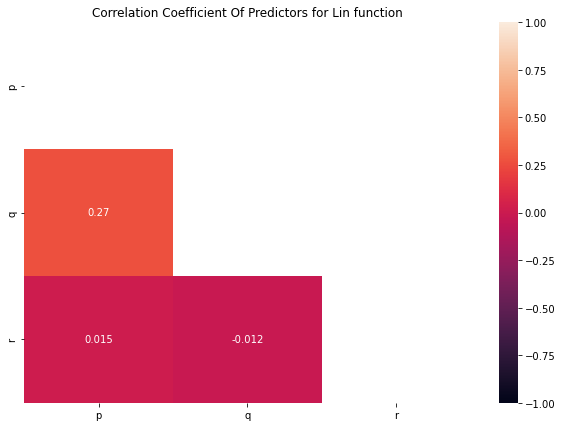

In [18]:
correlation(X_lin_train, "Lin function")

In [19]:
vif(X_lin_train)

        VIF feature
0  1.322925       p
1  1.271269       q
2  1.196897       r


## Quadratic function regression

In [20]:
sq_features = [
    'p', 'q', 'r',
    'p2', 'q2', 'r2', 'pq'
    ]
X_sq_train = training_features[sq_features]
X_sq_test = test_features[sq_features]

run_regression(X_sq_train, X_sq_test, training_targets, test_targets)

Intercept: 0.034335696489395516
Coeficients: [ 5.49192941e-04  5.52856529e-06 -9.87686123e-04 -9.81183659e-06
  1.06725323e-08  2.35285729e-05  1.70895013e-06]
Mean Absolute Error: 0.004091407834348765
Mean Squared Error: 2.531258781988644e-05


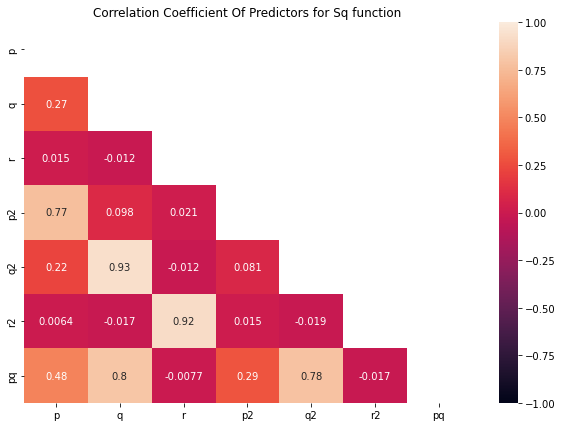

In [21]:
correlation(X_sq_train, "Sq function")

In [22]:
vif(X_sq_train)

        VIF feature
0  3.790851       p
1  9.663580       q
2  6.025501       r
3  2.602037      p2
4  8.301007      q2
5  4.890577      r2
6  3.903374      pq


## Cubic function regression

In [23]:
cub_features = [
    'p', 'q', 'r',
    'p2', 'q2', 'r2', 'pq',
    'p3', 'q3', 'r3', 'p2q', 'pq2'
    ]
X_cub_train = training_features[cub_features]
X_cub_test = test_features[cub_features]

run_regression(X_cub_train, X_cub_test, training_targets, test_targets)

Intercept: 0.03781996606037328
Coeficients: [-5.09613078e-05 -2.34855993e-05 -1.73214474e-03  2.02738340e-05
  1.08165338e-08  8.48481749e-05  1.23822857e-05 -2.68940831e-07
  1.76844551e-10 -1.16392202e-06 -4.26793941e-07 -1.60394373e-08]
Mean Absolute Error: 0.003966238784395771
Mean Squared Error: 2.4223111550462892e-05


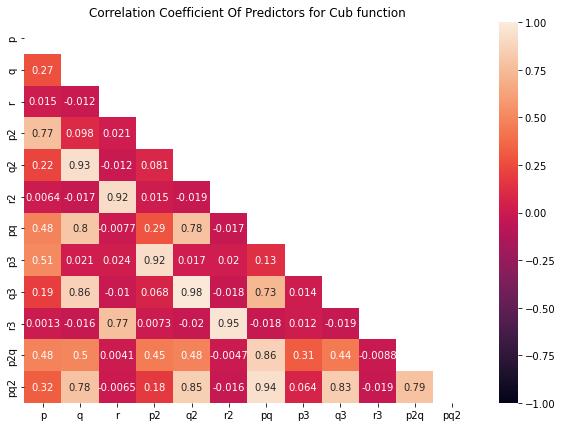

In [24]:
correlation(X_cub_train, "Cub function")

In [25]:
vif(X_cub_train)

           VIF feature
0    12.036588       p
1    35.854962       q
2    21.969513       r
3    41.841529      p2
4   276.966581      q2
5    81.998086      r2
6    49.738213      pq
7    20.875387      p3
8   147.759405      q3
9    34.365384      r3
10   10.092668     p2q
11   30.630941     pq2


## Quartic function regression

In [26]:
qua_features = [
    'p', 'q', 'r',
    'p2', 'q2', 'r2', 'pq',
    'p3', 'q3', 'r3', 'p2q', 'pq2',
    'p4', 'q4', 'r4', 'p3q', 'p2q2', 'pq3'
    ]
X_qua_train = training_features[qua_features]
X_qua_test = test_features[qua_features]

run_regression(X_qua_train, X_qua_test, training_targets, test_targets)

Intercept: 0.040430109789934825
Coeficients: [-2.10979902e-04 -1.01034613e-04 -2.31932629e-03  2.04795625e-05
  1.31113039e-06  1.65841430e-04  1.14337285e-05 -1.40495599e-06
 -6.55426185e-09 -4.92021540e-06  1.09258695e-06 -9.41295917e-08
  4.19440932e-08  1.19265500e-11  5.11827953e-08 -5.09427736e-08
 -3.25131488e-10  1.68809105e-10]
Mean Absolute Error: 0.004115076136825547
Mean Squared Error: 2.630170768972575e-05


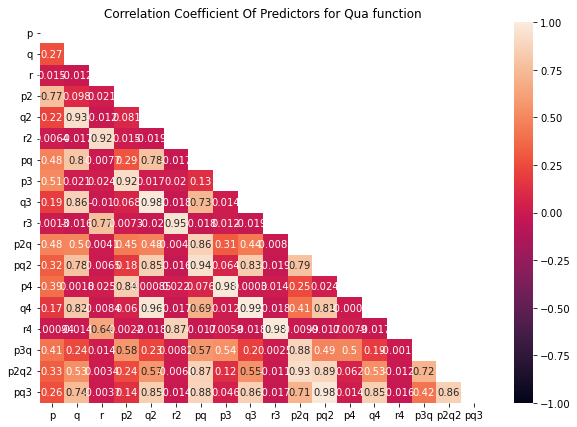

In [27]:
correlation(X_qua_train, "Qua function")

In [28]:
vif(X_qua_train)

             VIF feature
0      35.831386       p
1      99.339546       q
2      58.158973       r
3     334.616491      p2
4    2859.382355      q2
5     604.061608      r2
6     296.618767      pq
7     930.784992      p3
8   10584.228651      q3
9    1319.131555      r3
10    382.515718     p2q
11   1036.933690     pq2
12    309.498451      p4
13   3605.712838      q4
14    350.487380      r4
15     59.494705     p3q
16    122.531811    p2q2
17    451.576836     pq3


## Quintic function regression

In [29]:
qui_features = [
    'p', 'q', 'r',
    'p2', 'q2', 'r2', 'pq',
    'p3', 'q3', 'r3', 'p2q', 'pq2',
    'p4', 'q4', 'r4', 'p3q', 'p2q2', 'pq3',
    'p5', 'q5', 'r5', 'p4q', 'p3q2', 'p2q3', 'pq4'
    ]
X_qui_train = training_features[qui_features]
X_qui_test = test_features[qui_features]

run_regression(X_qui_train, X_qui_test, training_targets, test_targets)

Intercept: 0.038988050583477096
Coeficients: [ 2.73452709e-04  7.69022102e-05 -3.22249183e-03  6.43770345e-05
 -1.79747632e-06  3.50127821e-04 -1.23817261e-05 -2.88424111e-06
  5.91576673e-09 -1.93318856e-05 -6.48604231e-06  7.98548664e-07
 -1.87753585e-07  2.18593974e-11  5.08486844e-07  6.42796628e-07
  1.98766825e-09 -5.08237988e-09  7.56223729e-09 -8.82511427e-14
 -4.90135508e-09 -1.54514292e-08 -7.38101914e-10  2.68544307e-11
  9.36081253e-12]
Mean Absolute Error: 0.00390874892506921
Mean Squared Error: 2.399056248455771e-05


In [30]:
vif(X_qui_train)

              VIF feature
0       73.629868       p
1      202.351230       q
2      134.433809       r
3     1975.394363      p2
4    14480.283950      q2
5     2635.132297      r2
6     1162.006977      pq
7    19877.080442      p3
8   146023.292913      q3
9    18681.875732      r3
10    4836.584569     p2q
11   11439.820981     pq2
12   40237.047978      p4
13  253388.709121      q4
14   26217.586326      r4
15    5801.512764     p3q
16    6366.440611    p2q2
17   30595.800672     pq3
18   10082.823305      p5
19   54636.105284      q5
20    4763.553702      r5
21    1201.121846     p4q
22     921.399035    p3q2
23    1352.523526    p2q3
24    9561.838332     pq4


## Sextic fuction regression

In [31]:
sex_features = [
    'p', 'q', 'r',
    'p2', 'q2', 'r2', 'pq',
    'p3', 'q3', 'r3', 'p2q', 'pq2',
    'p4', 'q4', 'r4', 'p3q', 'p2q2', 'pq3',
    'p5', 'q5', 'r5', 'p4q', 'p3q2', 'p2q3', 'pq4',
    'p6', 'q6', 'r6', 'p5q', 'p4q2', 'p3q3', 'p2q4', 'pq5'
    ]
X_sex_train = training_features[sex_features]
X_sex_test = test_features[sex_features]

run_regression(X_sex_train, X_sex_test, training_targets, test_targets)

Intercept: 0.03716302646065289
Coeficients: [ 6.41521182e-04  4.26864527e-04 -4.16425862e-03  1.49566455e-04
 -1.14347869e-05  6.12884457e-04 -9.59479573e-05 -3.54045251e-05
  1.39510813e-07 -4.87573975e-05  1.13575542e-05  1.51210086e-06
  3.22956196e-06 -9.25921216e-10  2.01247903e-06 -1.22892966e-06
 -9.70097879e-08 -7.77024939e-09 -1.34380105e-07  3.16107259e-12
 -3.98682447e-08  7.20792845e-08  6.03178917e-09  2.29215937e-10
  1.41926779e-11  2.04292170e-09 -4.24431834e-15  2.99071239e-10
 -1.50403822e-09 -1.34608366e-10 -9.15186712e-12 -4.41111039e-14
 -4.79289535e-15]
Mean Absolute Error: 0.004105969677872586
Mean Squared Error: 2.6720938066070715e-05


In [32]:
vif(X_sex_train)

             VIF feature
0   1.853170e+02       p
1   4.540508e+02       q
2   1.447553e+02       r
3   9.033878e+03      p2
4   6.637748e+04      q2
5   1.131838e+04      r2
6   5.021280e+03      pq
7   2.013800e+05      p3
8   1.724533e+06      q3
9   1.707620e+05      r3
10  4.105683e+04     p2q
11  9.200262e+04     pq2
12  1.218757e+06      p4
13  9.349136e+06      q4
14  6.405601e+05      r4
15  1.524305e+05     p3q
16  1.298447e+05    p2q2
17  5.693379e+05     pq3
18  1.644294e+06      p5
19  1.023832e+07      q5
20  5.539205e+05      r5
21  2.009893e+05     p4q
22  8.529812e+04    p3q2
23  1.926295e+05    p2q3
24  9.108749e+05     pq4
25  3.120474e+05      p6
26  1.499423e+06      q6
27  6.933823e+04      r6
28  4.328958e+04     p5q
29  1.332526e+04    p4q2
30  7.112285e+03    p3q3
31  4.606705e+04    p2q4
32  2.162647e+05     pq5


# Regression with `curve_fit()`
- Comparison with sklearn `LinRegression()`

In [12]:
from polynomials import lin, sqr, cub, qua, qui, sex
from scipy.optimize import curve_fit

In [43]:
def polynomial_fit(X, X_test, y, y_test, poly):
    """
    Use non-linear least squares to fit a polynomial to data.
    
    poly(x = (p, q, r), *params) = t0 + t1*p + t2*q + t3*r + ...
    
    t0 : Intercept
    tj : Parameter j
    """
    train_size = y.shape[0]
    test_size = y_test.shape[0]
    
    # Train values
    p = X['p'].to_numpy()
    q = X['q'].to_numpy()
    r = X['r'].to_numpy()
    x = (p, q, r)
    
    # Test values
    p_test = X_test['p'].to_numpy()
    q_test = X_test['q'].to_numpy()
    r_test = X_test['r'].to_numpy()
    
    # Uncertainty in data (equivalent to the weights)
    sigma = np.zeros(train_size)
    for i in range(train_size):
        sigma[i] = 1.0 / (p[i]*q[i])
    
    popt, pcov = curve_fit(poly, x, y, sigma=sigma, absolute_sigma=True)
    
    print(f"Intercept: {popt[0]}\nCoeficients: {popt[1:]}")
    
    # Compute prediction with optimal parameters
    y_predict_data = []
    for i in range(test_size):
        x_test = (p_test[i], q_test[i], r_test[i])
        y_predict_data.append(poly(x_test, *popt))
    y_predict = np.array(y_predict_data)
    
    # Prediction errors
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    
    print(f"\nMean Absolute Error: {mae}\nMean Squared Error: {mse}")

In [44]:
polynomial_fit(X_lin_train, X_lin_test, training_targets, test_targets, lin)

Intercept: 0.03283872830640452
Coeficients: [ 5.23189391e-04  2.14102641e-05 -6.30788061e-04]

Mean Absolute Error: 0.004651749605877553
Mean Squared Error: 3.59184675138702e-05


In [45]:
polynomial_fit(X_sq_train, X_sq_test, training_targets, test_targets, sqr)

Intercept: 0.03637285674513599
Coeficients: [ 9.41846213e-04 -1.48918468e-05 -1.49160634e-03 -3.08412629e-05
  7.60278776e-08  3.87622941e-05  1.72102925e-06]

Mean Absolute Error: 0.004471662044067248
Mean Squared Error: 3.050252507743107e-05


In [46]:
polynomial_fit(X_cub_train, X_cub_test, training_targets, test_targets, cub)

Intercept: 0.031277152577022536
Coeficients: [ 1.37154963e-03  1.25066991e-04 -2.05459342e-03 -2.61510280e-05
 -7.47433115e-07  8.45231127e-05 -4.82591851e-06  1.05910393e-07
  1.29773670e-09 -9.67820827e-07 -1.56091974e-07  3.05284631e-08]

Mean Absolute Error: 0.006311099610576285
Mean Squared Error: 6.020653246412104e-05


In [47]:
polynomial_fit(X_qua_train, X_qua_test, training_targets, test_targets, qua)

Intercept: 0.05176043804913967
Coeficients: [-2.94168374e-03 -3.99295958e-04 -1.89587424e-03  2.12199803e-04
  4.11709486e-06  5.67512890e-05  6.28274365e-05 -6.66749422e-06
 -1.72087996e-08  2.10444896e-07 -7.59648489e-07 -4.12497533e-07
  9.53799729e-08  2.67273577e-11 -1.44518652e-08 -3.74461496e-08
  6.13197837e-09  7.09592355e-10]

Mean Absolute Error: 0.008430926991850702
Mean Squared Error: 0.00010324148942963138


In [48]:
polynomial_fit(X_qui_train, X_qui_test, training_targets, test_targets, qui)

Intercept: 0.04199951594683145
Coeficients: [ 2.93140122e-03 -2.06664978e-04 -3.54530832e-03 -6.66063609e-04
  3.74290769e-06  4.13475869e-04 -1.68429321e-05  6.72567174e-05
 -3.85713846e-08 -2.95141965e-05 -2.08851609e-06  6.83632353e-07
 -2.87185321e-06  1.83339070e-10  9.85090691e-07  2.92200365e-07
 -5.16355983e-09 -4.58058628e-09  4.22334686e-08 -3.05983562e-13
 -1.11917728e-08 -8.66826558e-09 -1.92810954e-10  2.41329614e-11
  8.88303034e-12]

Mean Absolute Error: 0.004809748897246877
Mean Squared Error: 3.569473638802276e-05


In [49]:
polynomial_fit(X_sex_train, X_sex_test, training_targets, test_targets, sex)

Intercept: 0.026769544418805562
Coeficients: [-5.90638377e-03  2.08661657e-03 -4.68386111e-03  2.96387584e-03
 -5.44030992e-05  7.28643041e-04 -1.97162496e-04 -4.22153493e-04
  6.15285830e-07 -6.63227379e-05 -9.43581217e-06  4.94810327e-06
  2.68574899e-05 -3.61796445e-09  2.99652123e-06  2.27640075e-06
 -2.16619785e-07 -3.15015499e-08 -7.99166076e-07  1.07544919e-11
 -6.16721378e-08 -8.68999965e-08  2.08320425e-09  1.04943452e-09
  8.28270143e-11  9.16470286e-09 -1.26359582e-14  4.64322409e-10
  3.57968909e-10  1.49625684e-10 -2.52908922e-11 -7.60129414e-13
 -8.79757867e-14]

Mean Absolute Error: 0.009249100858406557
Mean Squared Error: 0.00012393989233264833


## PARECEM EQUIVALENTES!!

# Dealing with multicollinearity (in construction)
Sophisticating the models with
- **Ridge Regression** - regression with regularization.
    - Adding bias to the estimates, this method reduces the standard errors.
    - Tuning hyperparameter using grid search.
- **Repeated 10-fold cross-validation** with three repetitions.
    - Evaluating the performance of models.

In [53]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [54]:
def run_Ridge_regression(X, X_test, y, y_test):
    # Compute the weights
    w = (X['p'] * X['q'])
    
    # Define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    
    # Define model
    ridge = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
    
    # Fit model
    ridge.fit(X, y, sample_weight=w)
    
    print(f"Intercept: {ridge.intercept_}\nCoeficients: {ridge.coef_}")
    
    print(f"==>CV\nalpha: {ridge.alpha_}\nBest estimator score (MAE): {ridge.best_score_}")

    # Predictions in test set
    y_predict = ridge.predict(X_test)

    # Prediction errors
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)

    print(f"==>TEST\nMean Absolute Error: {mae}\nMean Squared Error: {mse}")

In [55]:
run_Ridge_regression(X_lin_train, X_lin_test, training_targets, test_targets)

Intercept: 0.03224757877702118
Coeficients: [ 5.24248668e-04  1.61682411e-05 -4.25473435e-04]
==>CV
alpha: 0.99
Best estimator score (MAE): -0.004211788441586293
==>TEST
Mean Absolute Error: 0.0042317190072378216
Mean Squared Error: 2.7985210136420167e-05


In [45]:
def vif_ridge(X, alpha):
    """variance inflation factor for Ridge regression
    Adapted from:
    https://stackoverflow.com/questions/23660120/variance-inflation-factor-in-ridge-regression-in-python
    
    OBS: As pointed out in the thread __It's the vif that is left after using Ridge
                                        to work around the multicollinearity__
    """
    aux_X = np.asarray(X)
    corr = np.corrcoef(aux_X, rowvar=0)
    
    # Compute vif for ridge regression
    eye = np.eye(corr.shape[1])
    minv = np.linalg.inv(corr + alpha * eye)
    vif_values = minv.dot(corr).dot(minv)
    
    # Transform vif to dataframe
    vif = pd.DataFrame()
    vif['VIF'] = np.diag(vif_values)
    vif['feature'] = X.columns
    
    print(vif)

In [44]:
vif_ridge(X_lin_train, 0.99)

        VIF feature
0  0.247803       p
1  0.247809       q
2  0.252488       r


In [46]:
run_Ridge_regression(X_sq_train, X_sq_test, training_targets, test_targets)

Intercept: 0.03433569872836724
Coeficients: [ 5.49192100e-04  5.52855557e-06 -9.87685837e-04 -9.81181281e-06
  1.06725240e-08  2.35285626e-05  1.70895253e-06]
==>CV
alpha: 0.99
Best estimator score (MAE): -0.00412075783918427
==>TEST
Mean Absolute Error: 0.004091407461296476
Mean Squared Error: 2.5312582664309803e-05


In [48]:
vif_ridge(X_sq_train, 0.99)

        VIF feature
0  0.180470       p
1  0.121124       q
2  0.150012       r
3  0.194301      p2
4  0.126719      q2
5  0.150013      r2
6  0.155471      pq


In [49]:
run_Ridge_regression(X_cub_train, X_cub_test, training_targets, test_targets)

Intercept: 0.03781995754167924
Coeficients: [-5.09603811e-05 -2.34855794e-05 -1.73214239e-03  2.02737658e-05
  1.08166335e-08  8.48480056e-05  1.23822761e-05 -2.68939495e-07
  1.76844036e-10 -1.16391912e-06 -4.26793627e-07 -1.60394197e-08]
==>CV
alpha: 0.99
Best estimator score (MAE): -0.004060530062186408
==>TEST
Mean Absolute Error: 0.003966238384586907
Mean Squared Error: 2.4223106371197906e-05


In [50]:
vif_ridge(X_cub_train, 0.99)

         VIF feature
0   0.188731       p
1   0.119838       q
2   0.149809       r
3   0.091926      p2
4   0.063986      q2
5   0.074791      r2
6   0.067539      pq
7   0.152243      p3
8   0.097967      q3
9   0.132872      r3
10  0.150399     p2q
11  0.077657     pq2


In [ ]:
run_Ridge_regression(X_qua_train, X_qua_test, training_targets, test_targets)